In [10]:
import torch
import random
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: (x > 0.5).float() * -1 + 1
])

train_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

Epoch 1, Loss: 382.64700347185135
Epoch 2, Loss: 163.4074805676937
Epoch 3, Loss: 150.49896901845932
Epoch 4, Loss: 145.100740224123
Epoch 5, Loss: 142.37328597158194
Epoch 6, Loss: 140.22760690748692
Epoch 7, Loss: 139.98968438059092
Epoch 8, Loss: 136.88266570866108
Epoch 9, Loss: 135.1216001212597
Epoch 10, Loss: 133.31501621752977


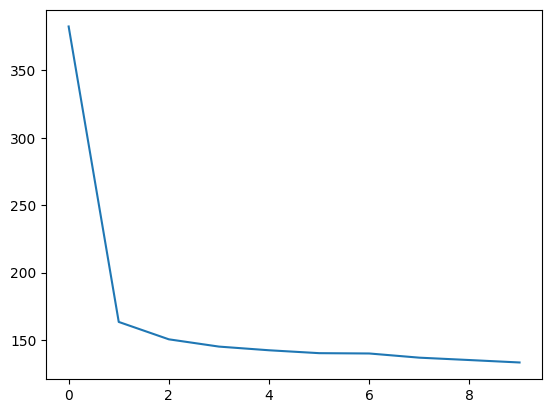

In [5]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.fc = nn.Linear(28*28*32, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(-1, 28*28*32)
        x = self.fc(x)
        return x
    
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
for epoch in range(10):
    epoch_loss = 0
    for i, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    losses.append(epoch_loss)

plt.plot(losses)
plt.show()

In [ ]:
model.eval()

test_data = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

correct = 0
total = 0

for i, (X, y) in enumerate(DataLoader(test_data, batch_size=128)):
    y_pred = model(X)
    correct += (y_pred.argmax(1) == y).sum().item()
    total += y.size(0)    

print(f"Accuracy: {correct/total*100:.2f}%")

Accuracy: 91.39%


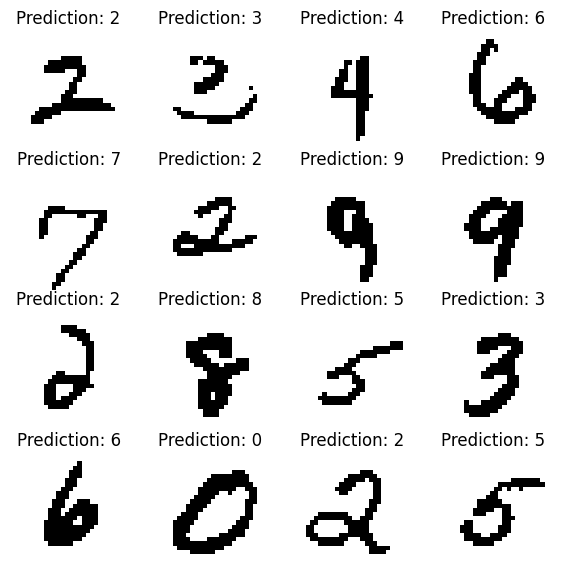

In [36]:
plt.figure(figsize=(7, 7))
for i in range(16):
    idx = random.randint(0, len(test_data))

    X = test_data[idx][0].unsqueeze(0)
    y = test_data[idx][1]

    y_pred = model(X)

    plt.subplot(4, 4, i+1)

    plt.imshow(X.squeeze().numpy(), cmap="gray")
    plt.title(f"Prediction: {y_pred.argmax(1).item()}")
    plt.axis("off")
plt.show()